In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.externals import joblib 
import csv

## Get the endpoint label wrt. city area

In [2]:
city_area = pd.read_table('endpoint._p3.txt')

In [3]:
city_area.head()

,px,py,name
0,41.154,-8.630,'Massarelos'
1,41.170,-8.665,'Massarelos'
2,41.140,-8.615,'Massarelos'
3,41.142,-8.607,'Massarelos'
4,41.178,-8.687,'Massarelos'


In [4]:
city_area["name"].describe()

count     25030
unique       71
top          []
freq      11506
Name: name, dtype: object

In [5]:
track_data = pd.read_csv("./train.csv")

In [6]:
## find the different labels
name_dic = []
name_count = []

for name in city_area["name"]:
    if name not in name_dic:
        name_dic.append(name)
        name_count.append(1)
    else:
        index = name_dic.index(name)
        name_count[index] += 1

In [43]:
for i in range(len(name_dic)):
    print("%s: %d" %(name_dic[i], name_count[i]))

'Massarelos': 860
'Cedofeita': 95
[]: 11506
'Lordelo do Ouro': 44
'Aldoar': 234
'Senhora da Hora': 1381
'Matosinhos': 292
'Nevogilde': 103
'Leça da Palmeira': 354
'Leça do Balio': 934
'Mafamude': 123
'Póvoa de Varzim': 342
'Perafita': 168
'Santa Marinha': 102
'Avioso (Santa Maria)': 396
'Avioso (São Pedro)': 55
'Maia': 5
'Santiago': 42
'São Cosme': 1343
'Vilar do Paraíso': 622
'Gueifães': 371
'São Mamede de Infesta': 79
'Gulpilhares': 3
'Valbom': 602
'Valadares': 543
'Custóias': 18
'Bagunte': 690
'Melres': 3
'Fânzeres': 3
'Campo': 143
'Carva': 159
'São Pedro da Cova': 381
'Ilha': 1
'Barosa': 218
'Fornos': 1
'Guifões': 916
'Condeixa-a-Velha': 3
'Vilar': 277
'Foz do Sousa': 1
'Vairão': 601
'Grijó': 1
'Feira': 23
'Anta': 107
'Silva Escura': 3
'Santa Cruz do Bispo': 328
'Sandim': 1
'Mezio': 4
'Bigorne': 4
'Cepões': 2
'Sé': 1
'Almacave': 1
'Peso da Régua': 2
'Godim': 4
'Santa Cristina': 1
'Vila Jusã': 185
'Medas': 64
'São Martinho': 6
'Gemunde': 54
'Guilhufe': 29
'Castelões de Cepeda': 1
'M

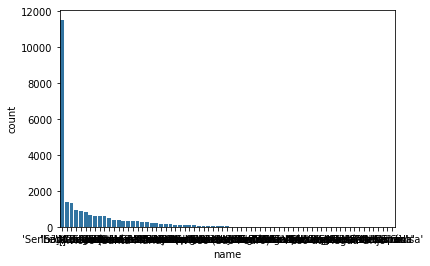

In [41]:
base_color = sb.color_palette()[0]
type_order = city_area["name"].value_counts().index
sb.countplot(data = city_area, x = "name", color = base_color,
            order = type_order)

In [7]:
print(len(city_area["name"]))
print(len(track_data["POLYLINE"]))

25030
1710670


In [10]:
array = track_data["POLYLINE"].apply(str2array)

In [11]:
## define function for picking data within the areas

def pick_data_in_area(string):
    line = str2array(string)
    if(len(line) > 0):
        for i in range(len(city_area["name"])):
            if((round(line[-1][0],3) == round(city_area["px"][i],3)) & (round(line[-1][1],3) == round(city_area["py"][i],3))):
                print("found!")
                return [line, i]
        return [[], i]

In [12]:
end_index = track_data["POLYLINE"].apply(pick_data_in_area)

KeyboardInterrupt: 

In [ ]:
print(end_index[1000:1010])

## Data before

In [2]:
area = []
with open('./deep_net/data/train_for_deepstructure_area.pickle', 'rb') as file:
    data_dict = pickle.load(file)
    area = data_dict['area']

In [9]:
def str2array(string):
    
    ret = []
    
    if(len(string) > 2):  
        together = ''
        for i in string:
            if(i != '['):
                together += i

        first = together.split("],")

        for i in range(len(first)):
            if(i==len(first)-1):
                second = ''
                for j in first[i]:
                    if(j!=']'):
                        second += j
                second = second.split(",")
            else:
                second = first[i].split(",")
            ret.append([float(second[0]), float(second[1])])
        return np.array(ret)
    
    else: return np.array(ret)

def tran_label(string):
    
    point = str2array(string)
    
    if(len(point) == 0):
        return 999999
    else:
        for i in range(len(area) - 1):
            if((point[-1][0]<area[i][0]) & (point[-1][1]<area[i][1]) & (point[-1][0]>=(area[i][0]-0.15)) 
               & (point[-1][1]>=(area[i][1]-0.15))):
                find = True 
                return i   

def pick_data(string):
    
    point = str2array(string)
    
    if(len(point) > 0):
        if((point[-1][0]<area[1133][0]) & (point[-1][0]>=(area[1133][0]-0.15)) 
           & (point[-1][1]<area[1133][1]) & (point[-1][1]>=(area[1133][1]-0.15))):
            
            return point
        else: return []
    else: return []

In [18]:
track_data = pd.read_csv("./train.csv")

In [45]:
array = track_data["POLYLINE"].apply(str2array)

In [46]:
number = 0
for a in array:
    if(len(a)>0):
        number += 1
print(number)

1704769


In [6]:
f = open('endpoint.txt','w')
for a in array:
    if(len(a)>0):
        f.write(str(a[-1]) + "\n")
f.close()

In [ ]:
for i in range(len(track_data["POLYLINE"])):
    if(len(track_data["POLYLINE"][i])>0):
        print(track_data["POLYLINE"][i][-21:])

In [27]:
track_data.head(10)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [28]:
track_data.tail(10)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1710660,1384165182620000170,C,NaN,NaN,20000170,1384165182,A,False,"[[-8.643303,41.13648]]"
1710661,1404164723620000332,B,NaN,15.0,20000332,1404164723,A,False,"[[-8.585703,41.148567],[-8.585739,41.148855],[..."
1710662,1404155105620000121,B,NaN,9.0,20000121,1404155105,A,False,"[[-8.606385,41.144742],[-8.606466,41.144742],[..."
1710663,1388660427620000585,C,NaN,NaN,20000585,1388660427,A,False,"[[-8.60697,41.162283],[-8.60697,41.16231],[-8...."
1710664,1390403767620000911,C,NaN,NaN,20000911,1390403767,A,False,[]
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-..."
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[..."
1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[]
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-..."
1710669,1404157147620000079,B,NaN,34.0,20000079,1404157147,A,False,"[[-8.615538,41.140629],[-8.615421,41.140746],[..."


In [29]:
track_data["CALL_TYPE"].describe()

count     1710670
unique          3
top             B
freq       817881
Name: CALL_TYPE, dtype: object

In [30]:
track_data.corr()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA
TRIP_ID,1.000000,0.026869,0.002541,-0.002983,1.000000,-0.000741
ORIGIN_CALL,0.026869,1.000000,NaN,-0.002216,0.026869,-0.001245
ORIGIN_STAND,0.002541,NaN,1.000000,0.015855,0.002541,0.001781
TAXI_ID,-0.002983,-0.002216,0.015855,1.000000,-0.002983,0.001798
TIMESTAMP,1.000000,0.026869,0.002541,-0.002983,1.000000,-0.000741
MISSING_DATA,-0.000741,-0.001245,0.001781,0.001798,-0.000741,1.000000


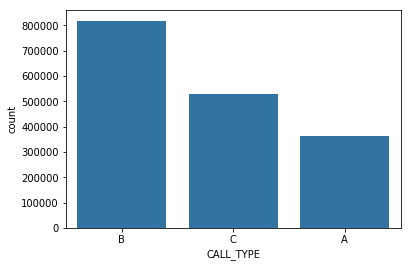

In [31]:
base_color = sb.color_palette()[0]
type_order = track_data["CALL_TYPE"].value_counts().index
sb.countplot(data = track_data, x = "CALL_TYPE", color = base_color,
            order = type_order)

In [ ]:
print(track_data["POLYLINE"][0])

In [ ]:
print(track_data["POLYLINE"][0][-1])

In [ ]:
copy = track_data

In [ ]:
copy["POLYLINE"].apply(tran_label)

In [ ]:
copy.corr()

In [ ]:
plt.matshow(copy.corr())

In [ ]:
draw = track_data

In [ ]:
plt.figure()

length = len(draw["POLYLINE"])

for i in range(10000):
    sys.stdout.write("plotting the %dth point of %d, %f%%   \r" % (i, length, ((i+1)*100/length)))
    sys.stdout.flush()
    point = str2array(draw["POLYLINE"][i])
    if(len(point) == 0):
        continue
    else:
        plt.plot(point[0], point[1], color[draw["CALL_TYPE"][i]], alpha = 0.1)

In [ ]:
ax = np.array([])
bx = np.array([])
cx = np.array([])
ay = np.array([])
by = np.array([])
cy = np.array([])

for i in range(length):
    sys.stdout.write("appending the %dth point of %d, %f%%   \r" % (i, length, ((i+1)/length*100)))
    sys.stdout.flush()
    point = str2array(draw["POLYLINE"][i])
    call_type = draw["CALL_TYPE"][i]
    if(len(point) == 0):
        continue
    if(call_type == "A"):
        ax = np.append(ax, point[0])
        ay = np.append(ay, point[1])
    elif(call_type == "B"):
        bx = np.append(bx, point[0])
        by = np.append(by, point[1])
    elif(call_type == "C"):
        cx = np.append(cx, point[0])
        cy = np.append(cy, point[1])
    else:
        print("point (%f, %f) has no type!" % (point[0], point[1]))

In [ ]:
plt.figure()
plt.scatter(ax, ay, s=50, c="r", alpha=0.2)
plt.show()

In [ ]:
plt.figure()
plt.scatter(bx, by, s=50, c="b", alpha=0.2)
plt.show()

In [ ]:
plt.figure()
plt.scatter(cx, cy, s=50, c="g", alpha=0.2)
plt.show()

In [ ]:
plt.figure()
plt.scatter(ax, ay, s=50, c="r", alpha=0.1)
plt.scatter(bx, by, s=50, c="b", alpha=0.1)
plt.scatter(cx, cy, s=50, c="g", alpha=0.1)
plt.show()

In [ ]:
with open('./endpoint_per_calltype.pickle', 'rb') as file:
    data_dict = pickle.load(file)
    ax = data_dict['ax']
    ay = data_dict['ay']
    bx = data_dict['bx']
    by = data_dict['by']
    cx = data_dict['cx']
    cy = data_dict['cy']

In [ ]:
data_dict = {'ax': ax, 'ay': ay, 'bx': bx, 'by': by, 'cx': cx, 'cy': cy, "index_label": copy}
with open('./endpoint_per_calltype.pickle','wb') as file:
    pickle.dump(data_dict, file)

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = track_data, x = "POLYLINE", color = base_color)

## only pick the data in area 1113

In [ ]:
data_1133 = track_data["POLYLINE"].apply(pick_data)

In [ ]:
print(data_1133[:100])

In [ ]:
train_data1133 = []
for valid in data_1133:
    if(len(valid)):
        train_data1133.append(valid)

In [ ]:
divid_area = []
x = area[1133][0] - 0.15

while(x < area[1133][0] + 0.005):
    y = area[1133][1] - 0.15
    while(y < area[1133][1] + 0.005):
        divid_area.append([x,y])
        y += 0.005
    x += 0.005

In [ ]:
print(len(divid_area))

In [ ]:
print(divid_area[-1])
print(area[1133])

In [ ]:
labels = []
for i in range(len(train_data1133)):
    found = False
    for j in range(len(divid_area)):
        if((train_data1133[i][-1][0]<divid_area[j][0]) & (train_data1133[i][-1][0]>=(divid_area[j][0]-0.005))
            & (train_data1133[i][-1][1]<divid_area[j][1]) & (train_data1133[i][-1][1]>=divid_area[j][1]-0.005)):
            labels.append(j)
            found = True
    if(not found):
        print("Error at:", i)
        break

In [ ]:
print(labels[:100])

In [ ]:
data_dict = {'divid_area': divid_area, 'labels': labels, 'train_data1133': train_data1133}
with open('./trackdata1133.pickle','wb') as file:
    pickle.dump(data_dict, file)

In [ ]:
with open('./trackdata1133.pickle', 'rb') as file:
    data_dict = pickle.load(file)
    divid_area = data_dict['divid_area']
    labels = data_dict['labels']
    train_data1133 = data_dict['train_data1133']

In [ ]:
def pick_data(data, data_length, labels):
    ret_train = []
    ret_labels = []
    n = 0
    for i in range(len(data)):
        if(len(data[i]) > data_length):
            split = (len(data[i])-1)//data_length
            ret_train.append([])
            for j in range(data_length):
                ret_train[n].append(data[i][split*j][0])
                ret_train[n].append(data[i][split*j][1])
            ret_labels.append(labels[i])
            n += 1
    return np.array(ret_train), np.array(ret_labels)

In [ ]:
data_length = 10
track_data1133, track_labels = pick_data(train_data1133, data_length, labels)

In [ ]:
print(track_data1133[:10])
print(track_labels[:10])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(track_data1133, track_labels, test_size = 0.3, random_state = 30)

In [ ]:
data_dict = {'divid_area': divid_area, 'labels': labels, 'train_data1133': train_data1133, 'track_labels': track_labels,
             'x_train': x_train, 'x_test': x_test, 'y_train': y_train, 'y_test': y_test}
with open('./trackdata1133.pickle','wb') as file:
    pickle.dump(data_dict, file)

In [ ]:
with open('./trackdata1133.pickle', 'rb') as file:
    data_dict = pickle.load(file)
    x_train = data_dict['x_train']
    x_test = data_dict['x_test']
    y_train = data_dict['y_train']
    y_test = data_dict['y_test']

In [ ]:
print(len(x_test))

In [ ]:
print('Training the SVM classifier......')
clf = svm.SVC()
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print("train score:", score)

## save the model
joblib.dump(clf, "./models/svm_normal_uniformmap1133.m")

## evaluate the model

test_predict = clf.predict(x_test)

print("valid score:", clf.score(x_test, y_test))